# Explore here

In [105]:
import os
import pandas as pd
import seaborn as sns
import matplotlib as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# load the .env file variables
load_dotenv()

#Cargo las variables necesarias para poder tener acceso a al api de spotify
clientID=os.environ.get('CLIENTID')
secretID=os.environ.get('SECRETID')

#ID del artista Julieta Venegas
artistID = '2QWIScpFDNxmS6ZEMIUvgm'

#Instanciar spotipy
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id = clientID,
                                                                                client_secret = secretID))

#Búsqueda de las 10 canciones más populares
resultados = spotify.artist_top_tracks(artistID)

#Creacion de las listas que guardaran los datos dados por la API
nombres = []
duraciones = []
popularidad = []

#Iterar sobre cada uno de los elementos 
for track in resultados['tracks']:

    name=track['name']

    duracion=track['duration_ms']

    minutos = duracion // 60000
    segundos = (duracion % 60000) / 1000
    
    duracion_en_minutos = minutos + segundos / 60
    duracion_en_minutos = round(duracion_en_minutos, 1)

    popu=track['popularity']

    #Se insertan los datos en las listas previamente creadas
    nombres.append(name)
    duraciones.append(duracion_en_minutos)
    popularidad.append(popu)

#creacion del dataframe desde un dicionario que tiene como valores las listas creadas y las columnas son las keys
dataframe=pd.DataFrame({
    'Nombre': nombres,
    'Duración': duraciones,
    'Popularidad': popularidad
})
dataframe.sort_values(["Popularidad"], inplace = True,ascending=False)
dataframe

,Nombre,Duración,Popularidad
0,Me Voy,3.1,82
2,Eres para Mí (with Anita Tijoux),3.2,74
3,Limón y Sal,3.4,74
1,Lo Siento BB:/,3.4,73
4,Andar Conmigo,3.2,73
5,Lento,4.0,70
6,Dos Soledades,3.2,67
8,Algo Está Cambiando,4.0,62
7,Nada Fue Un Error - Live In Spain / 2005,3.8,60
9,El Presente (Unplugged) (En Vivo),3.7,57


<Axes: xlabel='Popularidad', ylabel='Duración'>

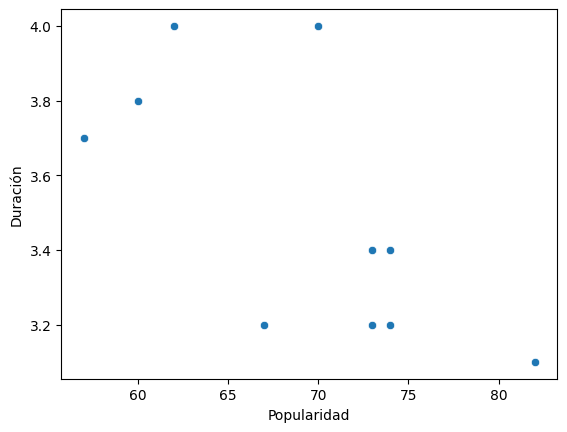

In [106]:
sns.scatterplot(data=dataframe, x="Popularidad", y="Duración")


Gracias al gráfico podemos ver la relación que hay entre la popularidad y la duración de las canciones. En el gráfico se nos demuestra una tendencia que mientas mas cortas son las canciones más populares la mismas aunque esta relacion no es directamente proporcional.